# Directed search
This notebook is used to analyse the results from the multi-objective robust optimization run. For this analysis we used problem formulation 2: the aggregated version.

For the optimization, a Multi-Objective Evolutionary Algorithm is used with the specifications below. The optimization searches over the levers of the model in order to find promising policies, and the epsilon is used to gain insight in the progress of the convergence metric.
* Functional evaluations = 50.000
* Epsilon = 0.01

The results of this run have been saved in two files:
- **convergence__pf2_50k_e001_step1.pkl** : this file stores the evolution of the optimization run in number of generations- epsilon pairs
- **optimization__pf2_50k_e001_step1.csv** : this csv file stores all policy-outcome combinations that resulted out of the directed search.


**Extra run**


In order to further seek convergence we also run an optimization with a higher number of functional evaluations:
* Functional evaluations = 100.000
* Epsilon = 0.01

The results of this run have been saved in two files:
- **convergence__pf2_100k_e001_step1.pkl** : this file stores the evolution of the optimization run in number of generations- epsilon pairs
- **optimization__pf2_100k_e001_step1.csv** : this csv file stores all policy-outcome combinations that resulted out of the directed search.


The optimization runs were conducted using the py-scripts **dike_model_optimization_50k.py** and/or **dike_model_optimization_100k.py**


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


# Import EMA workbench
from ema_workbench import MultiprocessingEvaluator
from ema_workbench import Policy
from ema_workbench.analysis import parcoords

# Import files
from problem_formulation import get_model_for_problem_formulation

#### 1. Convergence check - converged at 50.000 runs?
In order to check if the Multi-Objective Evolutionary Algorithm has converged, reaching a point when the solution space is sufficiently searched resulting into solutions that are close to the Pareto optimum front. A stabilisation at the end of the plot would translate into a marginally low contribution of each new solution, indicating convergence.  

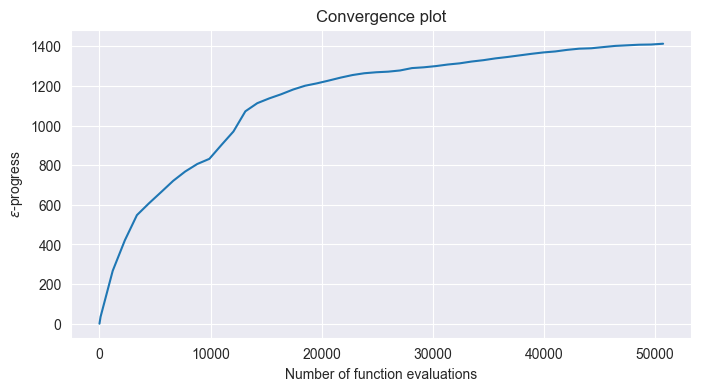

In [2]:
# Load the convergence object using pickle if pickle will
with open('convergence__pf2_50k_e001_step1.pkl', 'rb') as f:
    convergence50 = pickle.load(f)

# Plot the convergence
fig, ax1 = plt.subplots(ncols=1, sharex=True, figsize=(8, 4))
ax1.plot(convergence50.nfe, convergence50.epsilon_progress)
ax1.set_title('Convergence plot')
ax1.set_xlabel('Number of function evaluations')
ax1.set_ylabel(r'$\epsilon$-progress')  


plt.show()

In [3]:
# Check the progress of the last 10.000 runs by reading the coordinates of the nfe-epsilon dataframe:
# convergence50

As we can see in the graph above the Multi-Objective Evolutionary Algorithm has almost reached convergence. In the last 5.000 runs the epsilon has progressed with about 17 units, that translates into a just 1.2% increase of the total performance attributed to the last 10% of the runs.
- [nfe: 45349 - epsilon_progress: 1396]
- [nfe: 50738 - epsilon_progress: 1413]

Even though the conversion hasn't completed yet, we will look for the solutions that come out as optimal out of this run by applying the political constraints. 

#### 2. Optimization 50k run

In [4]:
results50 = pd.read_csv('results/data/optimization__pf2_50k_e001_step1.csv')
results50.describe()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,3.140000e+02,3.140000e+02,3.140000e+02,314.000000,314.000000
mean,156.500000,0.500000,0.022293,0.550955,0.305732,0.089172,0.914013,0.656051,1.111465,1.729299,1.073248,1.340764,1.081165e+08,6.974866e+07,1.239615e+08,595.158604,0.016176
std,90.788215,0.500798,0.147870,0.498191,0.461452,0.285447,0.916094,0.895237,1.413195,1.473938,1.283111,1.439447,1.217543e+08,4.652299e+07,1.466020e+08,860.234009,0.025243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,78.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.362370e+07,2.848862e+07,3.070000e+07,0.000000,0.003256
50%,156.500000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,6.189150e+07,7.115423e+07,8.460000e+07,190.379138,0.008691
75%,234.750000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.422500e+08,1.045581e+08,2.058000e+08,832.813899,0.018192
max,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,6.000000,5.000000,7.000000,6.000000,5.441625e+08,1.633890e+08,7.104000e+08,4170.423800,0.181375


In [5]:
# results50.columns

In [6]:
## Create aggregate outcomes of total investment costs and amount of rfr (as these are important political points)
results50['total_costs [mil]'] = (results50['Dike Investment Costs'] + results50['RfR Investment Costs'] + results50['Evacuation Costs'])/1000000
results50['Expected Annual Damage [mil]'] = results50['Expected Annual Damage']/1000000
results50["total_RfR"] = results50[[f"{i}_RfR 0" for i in range(5)]].sum(axis=1)

In [7]:
results50

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
0,0,1,0,0,0,0,1,0,0,1,1,0,9.283522e+07,2.662009e+07,84600000.0,760.980933,0.010215,111.220849,92.835216,1
1,1,0,0,0,0,0,0,0,0,0,0,0,5.441625e+08,0.000000e+00,0.0,0.000000,0.181375,0.000000,544.162511,0
2,2,0,0,0,0,0,1,2,1,3,0,1,8.824306e+07,1.247356e+08,0.0,833.901805,0.008267,124.736406,88.243056,0
3,3,1,0,1,0,0,2,0,0,0,0,0,1.927174e+08,0.000000e+00,115300000.0,2878.819906,0.009036,115.302879,192.717432,2
4,4,1,0,1,0,0,0,0,0,2,1,2,5.582674e+07,5.606685e+07,115300000.0,0.000000,0.015969,171.366848,55.826739,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,1,0,0,0,0,0,0,1,3,2,2,2.634186e+07,9.735346e+07,84600000.0,0.000000,0.008044,181.953465,26.341864,1
310,310,0,0,0,0,0,0,1,1,3,1,2,7.493352e+07,1.290371e+08,0.0,0.000000,0.018675,129.037086,74.933522,0
311,311,1,0,0,0,0,1,0,3,4,3,4,6.225488e+06,1.160766e+08,84600000.0,50.570257,0.000696,200.676654,6.225488,1
312,312,0,0,0,0,0,0,2,3,5,3,4,6.225488e+06,1.557268e+08,0.0,0.000000,0.001934,155.726824,6.225488,0


#### 3. Policital no-go's
Based on the debates, a few political no-go's emerged that the policies must meet
* Rijkswaterstaat = total deaths to zero
* Delta = at least one RfR, preferably two (due to budget constainst, the latter is probably needed)
* Provinces = pay as little as possible as possible if RfR is involved (can leveled out as Delta will pay more with more RfR projects, up to 50%)

Other preference: 
* Transport = increase dike 3 and 5 with at least 5 dm
* Environmental = as many room for rivers as possible

Our client, Rijkswaterstaat is aiming for a 6-0 vote in favour of the suggested policy. However, as safety is the main priority of Rijkswaterstaat and longevity (translated into a rfr preference) is the priority of Delta having the budget. The provinces plead for safety and as little damage  as possible, having a budget of their own to contribute with a preference for dike heightenings.
The preferences of the environmental groups are also supported by the goals of Delta. The transport's group preference for dike heightenings is shared with the Provinces. Their specific wishes (5dm) will be explored but are not considered a no-go.


##### 3.1 Rijkswaterstaat en Delta no-gos

In [8]:
# Rijkswaterstaat constraint (for disaggregated version)
possible_policies_50 = results50[results50['Expected Number of Deaths']<0.001]
print(f'Amount of feasible policies based on Rijkswaterstaat constraints: {len(possible_policies_50)}')

Amount of feasible policies based on Rijkswaterstaat constraints: 37


In [9]:
# Delta commission constraints
possible_policies_50 = possible_policies_50[possible_policies_50['total_RfR']>=1] 
print(f'Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints: {len(possible_policies_50)}')

Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints: 33


In [10]:
possible_policies_50.head()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
42,42,1,0,1,1,1,2,0,3,2,3,3,2.300663e+06,1.088155e+08,492600000.0,25.420875,0.000196,601.415477,2.300663,4
45,45,1,0,0,0,0,3,0,4,4,3,4,4.517252e+06,1.215925e+08,84600000.0,87.253602,0.000146,206.192565,4.517252,1
50,50,1,0,1,1,0,0,0,3,3,2,3,1.854506e+06,1.097243e+08,236500000.0,0.000000,0.000330,346.224338,1.854506,3
62,62,1,0,1,1,0,2,0,3,3,3,3,0.000000e+00,1.108457e+08,236500000.0,0.000000,0.000000,347.345666,0.000000,3
63,63,0,0,1,0,0,0,2,3,3,3,5,1.820259e+06,1.544260e+08,30700000.0,0.000000,0.000490,185.126019,1.820259,1


##### 3.2 Exploration of Transport Company preferences
As explained before, the preferences of the transport company will be considered below. However the analysis shows that none of the policies suggested by the optimization that is plausible with the wishes of Delta and Rijkswaterstaat, but including one of the two dikes at the height asked is possible. If this results survives the damage constraint below it will be included in the final policies.

In [11]:
# # Transport company constraints
possible_policies_tr = possible_policies_50[((possible_policies_50['A.3_DikeIncrease 0']>5) & (possible_policies_50['A.5_DikeIncrease 0']>5))]
print(f'Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: {len(possible_policies_tr)}')

Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: 0


In [12]:
# # Transport company constraints
possible_policies_tr_2 = possible_policies_50[((possible_policies_50['A.3_DikeIncrease 0']>5) | (possible_policies_50['A.5_DikeIncrease 0']>5))]
print(f'Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: {len(possible_policies_tr_2)}')
possible_policies_tr_2

Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: 1


,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
163,163,1,0,0,0,0,0,0,6,4,4,6,0.0,1.424174e+08,84600000.0,0.0,0.0,227.017351,0.0,1


##### 3.3 Damage constraints
Expected annual damage is not wanted; neither by the Rijkswaterstaat (safety and a sustainable plan for a long timeperiod) nor bij the regional authorities so it will be constraint to a value of 0:

In [13]:
# Collective aversity to damage
plausible_policies_50 = possible_policies_50[possible_policies_50['Expected Annual Damage']<=0] 
print(f'Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints without a damage: {len(plausible_policies_50)}')

Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints without a damage: 5


In [14]:
plausible_policies_50

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
62,62,1,0,1,1,0,2,0,3,3,3,3,0.0,1.108457e+08,236500000.0,0.0,0.0,347.345666,0.0,3
156,156,1,0,1,0,0,3,0,4,3,7,5,0.0,1.284949e+08,115300000.0,0.0,0.0,243.794934,0.0,2
163,163,1,0,0,0,0,0,0,6,4,4,6,0.0,1.424174e+08,84600000.0,0.0,0.0,227.017351,0.0,1
186,186,1,0,0,1,0,1,0,4,5,3,4,0.0,1.239875e+08,205800000.0,0.0,0.0,329.787495,0.0,2
246,246,0,0,1,0,0,1,2,4,3,4,5,0.0,1.611837e+08,30700000.0,0.0,0.0,191.883680,0.0,1


#### 4. Visualisation of policy performance

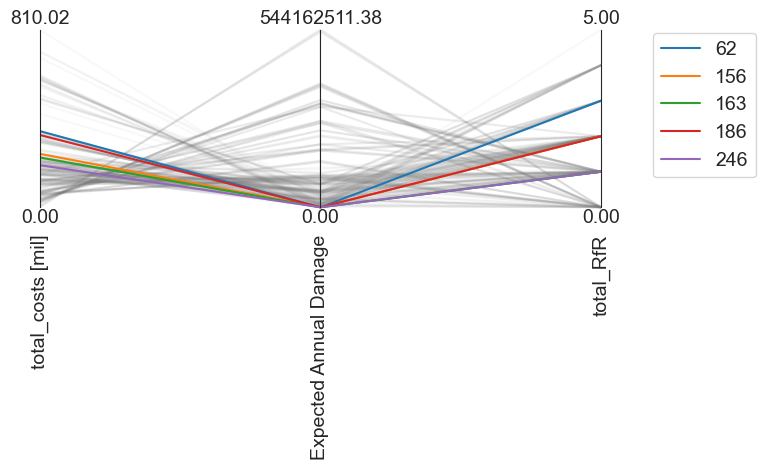

In [15]:
# Visualise the policies using parallel coordinates

# Custom colors
custom_pallet = sns.color_palette(n_colors=len(plausible_policies_50))

# Plot performance over costs, damage and # rfr projects
ooi = ['total_costs [mil]', 'Expected Annual Damage', 'total_RfR']
data = results50.loc[:, ooi]

# Set limits
limits = parcoords.get_limits(data)
limits.loc[0, ooi] = 0
paraxes = parcoords.ParallelAxes(limits)

# Enter all optimization options
paraxes.plot(data,color='grey',alpha=0.05)

# Enter possible policies
for i, (ind, row) in enumerate(plausible_policies_50.reset_index().iterrows()):
            paraxes.plot(row.to_frame().T, label=int(row['index']),
                          color=custom_pallet[i])
paraxes.legend() 
plt.show()

#### 5. Convergence check - converged at 100.000 runs?
As can be seen in the graph below the Algorithm has converged after 100.000 functional evaluations. 
As we can see in the graph above the Multi-Objective Evolutionary Algorithm has almost reached convergence. In the last 10.000 runs the epsilon has progressed with about 5 units, that translates into a just 0.3% increase of the total performance attributed to the last 10% of the runs.
- [nfe: 90.160 - epsilon_progress: 1728]
- [nfe: 100.255 - epsilon_progress: 1733]

Even though the conversion hasn't completed yet, we will look for the solutions that come out as optimal out of this run by applying the political constraints. 

In [16]:
# Check the numbers for the performance
# convergence100

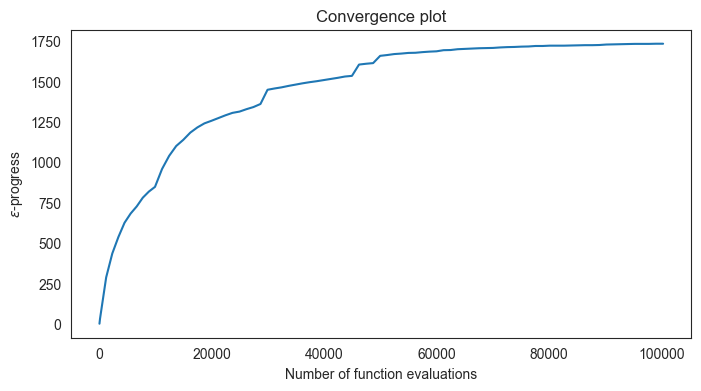

In [17]:
# Load the convergence object using pickle
with open('convergence__pf2_100k_e001_step1.pkl', 'rb') as f:
    convergence100 = pickle.load(f)
    
#  Plot the convergence
fig, ax1 = plt.subplots(ncols=1, sharex=True, figsize=(8, 4))
ax1.plot(convergence100.nfe, convergence100.epsilon_progress)
ax1.set_title('Convergence plot')
ax1.set_xlabel('Number of function evaluations')
ax1.set_ylabel(r'$\epsilon$-progress')  

plt.show()

#### 6. Optimization 100k run

In [18]:
results100 = pd.read_csv('results/data/optimization__pf2_100k_e001_step1.csv')
results100.describe()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,3.800000e+02,3.800000e+02,3.800000e+02,380.000000,380.000000
mean,189.500000,0.576316,0.002632,0.610526,0.373684,0.126316,0.800000,0.573684,0.928947,1.800000,0.813158,1.289474,8.253343e+07,6.863280e+07,1.457126e+08,455.395858,0.012714
std,109.840794,0.494793,0.051299,0.488274,0.484419,0.332643,0.835871,0.873136,1.259352,1.316428,1.064830,1.239369,8.022239e+07,4.238625e+07,1.557037e+08,610.090424,0.016517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,94.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.417576e+07,3.135801e+07,3.070000e+07,0.000000,0.003615
50%,189.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,5.701113e+07,6.961382e+07,9.995000e+07,173.570375,0.007539
75%,284.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.004885e+08,9.758875e+07,2.365000e+08,705.369043,0.014839
max,379.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,4.000000,6.000000,6.000000,3.701045e+08,1.749136e+08,4.926000e+08,2983.118083,0.115317


In [19]:
results100

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,0,0,0,0,0,1,3,5,4,3,5,5.524628e+05,1.732351e+08,0.0,5.109622,0.000037
1,1,0,0,1,0,0,1,0,0,0,1,0,2.413697e+08,6.320800e+06,30700000.0,677.388160,0.019728
2,2,0,0,0,0,0,2,0,0,0,0,0,3.701045e+08,0.000000e+00,0.0,2697.444418,0.017298
3,3,0,0,0,0,0,2,3,4,4,6,6,0.000000e+00,1.749136e+08,0.0,0.000000,0.000000
4,4,1,0,1,0,0,2,0,0,0,0,0,1.307659e+08,0.000000e+00,115300000.0,1862.984504,0.006740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,1,0,1,1,1,0,0,3,2,2,3,3.140073e+06,1.076941e+08,492600000.0,0.000000,0.001783
376,376,0,0,0,0,0,0,2,2,4,3,3,1.632380e+07,1.452819e+08,0.0,0.000000,0.005010
377,377,1,0,1,1,1,0,0,3,3,2,3,4.939059e+05,1.097243e+08,492600000.0,0.000000,0.000087
378,378,1,0,0,0,0,0,0,2,4,3,3,1.632380e+07,1.080267e+08,84600000.0,0.000000,0.005010


In [20]:
# results100.columns

In [21]:
## Create aggregate outcomes of total investment costs and amount of rfr (as these are important political points)
results100['total_costs [mil]'] = (results100['Dike Investment Costs'] + results100['RfR Investment Costs'] + results100['Evacuation Costs'])/1000000
results100['Expected Annual Damage [mil]'] = results100['Expected Annual Damage']/1000000
results100["total_RfR"] = results100[[f"{i}_RfR 0" for i in range(5)]].sum(axis=1)

#### 7. Policital no-go's (100k)
The political constraints as discussed in part 3. Political no-go's will be implemented for this larger run of 100.000 function evaluations aswell.


##### 7.1 Rijkswaterstaat en Delta no-gos (100k)

In [22]:
# Rijkswaterstaat constraint (for disaggregated version)
possible_policies_100 = results100[results100['Expected Number of Deaths']<0.001]
print(f'Amount of feasible policies based on Rijkswaterstaat constraints: {len(possible_policies_100)}')

Amount of feasible policies based on Rijkswaterstaat constraints: 40


In [23]:
# Delta commission constraints
possible_policies_100 = possible_policies_100[possible_policies_100['total_RfR']>=1] 
print(f'Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints: {len(possible_policies_100)}')

Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints: 34


One extra policy is added by the 100k run.

In [24]:
possible_policies_100.head()

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
6,6,1,0,1,1,0,0,0,3,3,3,3,0.000000e+00,1.108457e+08,236500000.0,0.000000,0.000000,347.345666,0.000000,3
128,128,1,1,1,1,0,0,0,3,3,3,3,0.000000e+00,1.108457e+08,454300000.0,0.000000,0.000000,565.145665,0.000000,4
188,188,1,0,1,0,0,2,0,2,3,0,3,2.581665e+07,9.736797e+07,115300000.0,417.798236,0.000797,212.668392,25.816649,2
212,212,1,0,0,1,0,0,0,3,4,3,3,1.700594e+06,1.130510e+08,205800000.0,0.000000,0.000529,318.851013,1.700594,2
223,223,0,0,1,0,0,1,2,4,3,5,5,0.000000e+00,1.625573e+08,30700000.0,0.000000,0.000000,193.257257,0.000000,1


##### 6.2 Exploration of Transport Company preferences (100k)
As explained before, the preferences of the transport company will be considered below. However the analysis shows that none of the policies suggested by the optimization that is plausible with the wishes of Delta and Rijkswaterstaat, but including one of the two dikes at the height asked is possible. If this results survives the damage constraint below it will be included in the final policies.

In [25]:
# # Transport company constraints
possible_policies_tr = possible_policies_100[((possible_policies_100['A.3_DikeIncrease 0']>5) & (possible_policies_100['A.5_DikeIncrease 0']>5))]
print(f'Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: {len(possible_policies_tr)}')

Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: 0


In [26]:
# # Transport company constraints
possible_policies_tr_2 = possible_policies_100[((possible_policies_100['A.3_DikeIncrease 0']>5) | (possible_policies_100['A.5_DikeIncrease 0']>5))]
print(f'Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: {len(possible_policies_tr_2)}')
possible_policies_tr_2

Amount of feasible policies based on Rijkswaterstaat, Delta Comission and Transport company constraints: 1


,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
373,373,1,0,0,0,0,2,0,4,4,4,6,0.0,1.297308e+08,84600000.0,0.0,0.0,214.330821,0.0,1


##### 6.3 Damage constraints (100k)
Expected annual damage is not wanted; neither by the Rijkswaterstaat (safety and a sustainable plan for a long timeperiod) nor bij the regional authorities so it will be constraint to a value of 0:

In [27]:
# Collective aversity to damage
plausible_policies_100 = possible_policies_100[possible_policies_100['Expected Annual Damage']<=0] 
print(f'Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints without a damage: {len(plausible_policies_100)}')

Amount of feasible policies based on Rijkswaterstaat and Delta Commission constraints without a damage: 6


In [28]:
plausible_policies_100

,Unnamed: 0,0_RfR 0,1_RfR 0,2_RfR 0,3_RfR 0,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total_costs [mil],Expected Annual Damage [mil],total_RfR
6,6,1,0,1,1,0,0,0,3,3,3,3,0.0,1.108457e+08,236500000.0,0.0,0.0,347.345666,0.0,3
128,128,1,1,1,1,0,0,0,3,3,3,3,0.0,1.108457e+08,454300000.0,0.0,0.0,565.145665,0.0,4
223,223,0,0,1,0,0,1,2,4,3,5,5,0.0,1.625573e+08,30700000.0,0.0,0.0,193.257257,0.0,1
227,227,1,0,0,1,0,3,0,4,4,3,3,0.0,1.185669e+08,205800000.0,0.0,0.0,324.366886,0.0,2
288,288,1,0,1,0,0,3,0,4,3,5,5,0.0,1.253021e+08,115300000.0,0.0,0.0,240.602053,0.0,2
373,373,1,0,0,0,0,2,0,4,4,4,6,0.0,1.297308e+08,84600000.0,0.0,0.0,214.330821,0.0,1


#### 8. Visualisation of policy performance (100k)

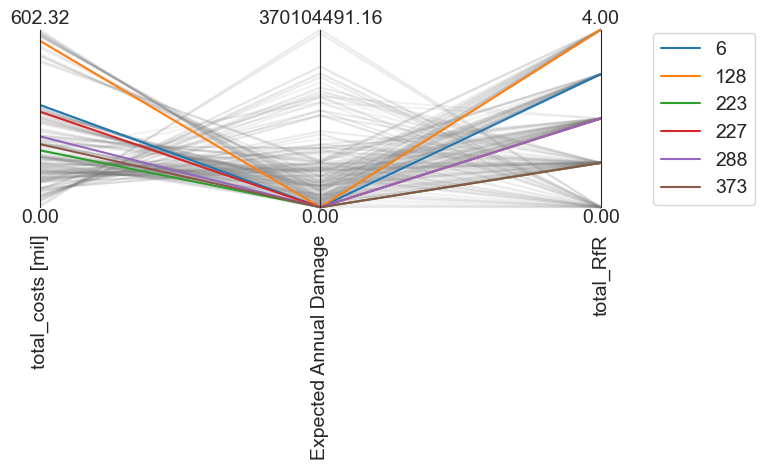

In [31]:
# Visualise the policies using parallel coordinates

# Custom colors
custom_pallet = sns.color_palette(n_colors=len(plausible_policies_100))

# Plot performance over costs, damage and # rfr projects
ooi = ['total_costs [mil]', 'Expected Annual Damage', 'total_RfR']
data = results100.loc[:, ooi]

# Set limits
limits = parcoords.get_limits(data)
limits.loc[0, ooi] = 0
paraxes = parcoords.ParallelAxes(limits)

# Enter all optimization options
paraxes.plot(data,color='grey',alpha=0.05)

# Enter possible policies
for i, (ind, row) in enumerate(plausible_policies_100.reset_index().iterrows()):
            paraxes.plot(row.to_frame().T, label=int(row['index']),
                          color=custom_pallet[i])
paraxes.legend()
plt.show()

In [32]:
# Save selected policies to csv
possible_policies_100.to_csv('results/plausible_policies.csv')